<a href="https://colab.research.google.com/github/mengjie514/Moral-Emotional-Analysis/blob/main/HPALL_SampleCode_III_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3. Exploratory Data Analysis (EDA)**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks/PSIV")
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', -1)

df = pd.read_excel('output_for_R_0.50.xlsx')
df = df[['care', 'harm','fairness','cheating','loyalty','betrayal','authority','subversion', 'purity','degradation','non-moral','annotation_main','new_clean_text','new_clean_text_deep_stem','Corpus']]
df.columns = ['care0', 'harm0','fairness0','cheating0','loyalty0','betrayal0','authority0','subversion0', 'purity0','degradation0','non-moral0','annotation_main','new_clean_text','new_clean_text_deep_stem','Corpus']
df = df[df['new_clean_text_deep_stem'].notna()]
df = df[df['annotation_main'].notna()]

df.reset_index(inplace=True)
df_words = df

print("Number of rows in data =", df.shape[0])
print("Number of columns in data =", df.shape[1])
print("\n")
print("**Sample data:**")
df.head(1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


Number of rows in data = 31277
Number of columns in data = 16


**Sample data:**


,index,care0,harm0,fairness0,cheating0,loyalty0,betrayal0,authority0,subversion0,purity0,degradation0,non-moral0,annotation_main,new_clean_text,new_clean_text_deep_stem,Corpus
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,"care,purity",Peace and Love Prevail. God Bless.,peac love prevail god bless,ALM


**3.1 Turning annotation list into set of columns of binary data**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

annotation_new=[]

for cell in df['annotation_main']:
    cell=cell.replace(" ", "")
    cell=cell.replace("&", "& ")
    annotation_new.append(cell.split(","))

df['annotation_new'] = annotation_new

mlb = MultiLabelBinarizer()
binary_labels=pd.DataFrame(mlb.fit_transform(df['annotation_new']),columns=mlb.classes_)
binary_labels=binary_labels.sort_index(axis=1)

df = df.join(binary_labels)
df = df[['new_clean_text_deep_stem', 'care', 'harm','fairness','cheating','loyalty','betrayal','authority','subversion', 'purity','degradation','non-moral']]

df.head(1)

,new_clean_text_deep_stem,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation,non-moral
0,peac love prevail god bless,1,0,0,0,0,0,0,0,1,0,0


**3.2 Count number of texts under each/multi labels**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


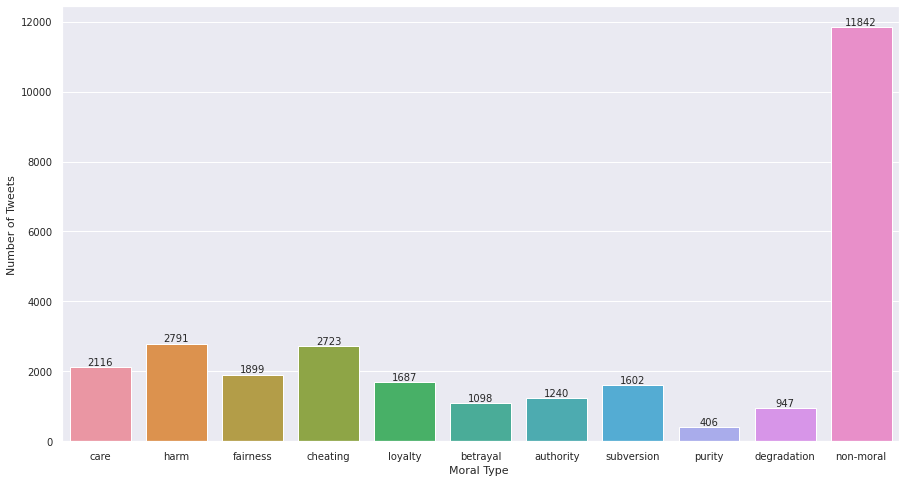

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = list(df.iloc[:,1:].columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df.iloc[:,1:].sum().values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.ylabel('Number of Tweets', fontsize=11)
plt.xlabel('Moral Type ', fontsize=11)

rects = ax.patches
labels = df.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=10)
plt.show()

**3.3 Count number of texts having multi labels**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


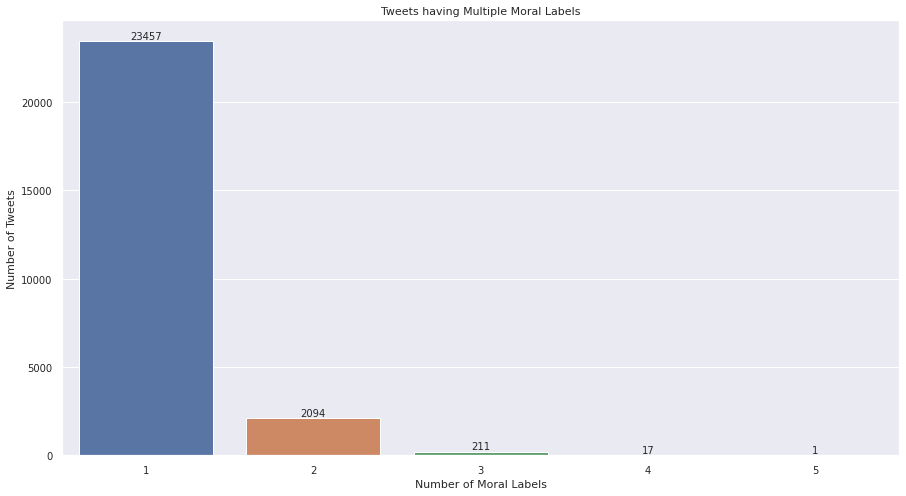

In [ ]:
rowSums = df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.title("Tweets having Multiple Moral Labels", fontsize=11)
plt.ylabel('Number of Tweets', fontsize=11)
plt.xlabel('Number of Moral Labels', fontsize=11)

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=10)
plt.show()

**4. Modelling**

**Learning Features from the MFTC**

To analyze tweets from the Moral Foundations Twitter Corpus (MFTC), we used different **word embeddings** combined with various **machine learning and deep learning** algorithms.

🗂️ **4.1 Word Embeddings – Turning Text into Numbers**

> **Why**: Since computers can’t understand text the way we do, we need to convert words into **numbers** so the models can analyze patterns. This process is called **word embedding**, where each word is turned into a **vector** - a series of numbers that capture its meaning.


> **Methods Used**:
> *   **BoW (Bag of Words)**: Counts how often each word appears, treating all words as **equally important**. Simple, but it ignores the meaning of words.
*   **TF-IDF (Term Frequency-Inverse Document Frequency)**: Similar to BoW, but gives more weight to **important** words and less to **common** ones like "the" or "and".
*   **Word2Vec**: Captures the meaning of words based on their **context** in a sentence, allowing the model to understand that words like "**care**" and "**compassion**" are related.


🤖 **4.2 Machine Learning Models – Finding Patterns in Text**


> **Why**: Machine learning models help us identify patterns in tweets, like which words are associated with different moral foundations.

> **Algorithms Used:**
> *   **Multinomial Naive Bayes**: Great for classifying text, especially when dealing with short messages like tweets.
*   **Support Vector Machine (SVM)**: Effective for text classification, helping us separate tweets that express different moral sentiments.
*   **Logistic Regression**: Simple and fast-useful for quickly predicting which moral foundation a tweet might belong to.
*   **XGBoost**: A powerful algorithm that uses decision trees to identify complex patterns in text.

> 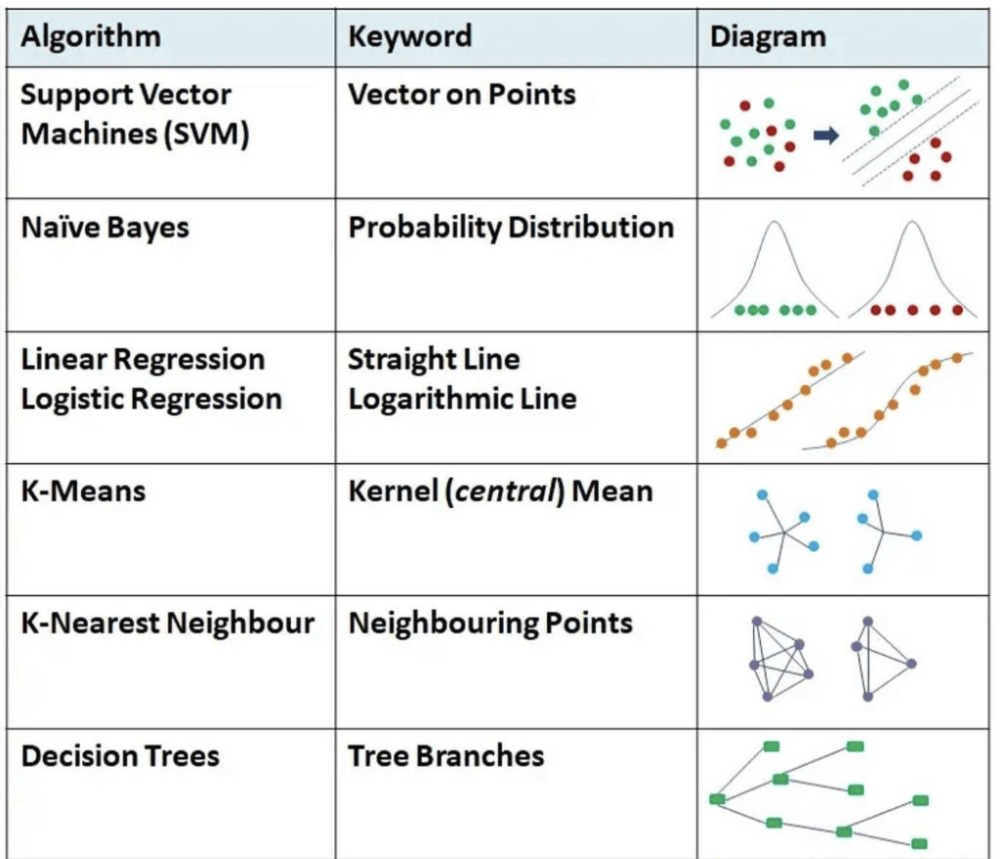

In [ ]:
! pip install scikit-multilearn
import sklearn
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, confusion_matrix, multilabel_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from skmultilearn.problem_transform import ClassifierChain, LabelPowerset
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import log_loss, hamming_loss

seeds = [1, 43, 678, 90, 135]
X_train, X_test, y_train, y_test = train_test_split(df['new_clean_text_deep_stem'],
                                                    df.drop(['new_clean_text_deep_stem'], axis=1),
                                                    test_size=0.3,
                                                    random_state=seeds[0],
                                                    shuffle=True)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21893,) (21893, 11)
(9384,) (9384, 11)


In [ ]:
#Classic BoW
vectorizer = feature_extraction.text.CountVectorizer(max_features=5000)
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

labels = ['care', 'harm', 'fairness', 'cheating', 'loyalty', 'betrayal', 'authority', 'subversion', 'purity', 'degradation', 'non-moral']

def run_pipeline(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    print(accuracy_score(y_test, predictions),
          f1_score(y_test, predictions, average = 'weighted'),
          roc_auc_score(y_test, predictions))

print("MultinomialNB:")
print( run_pipeline(Pipeline([('clf', MultiOutputClassifier(MultinomialNB()))]),
             X_train, y_train, X_test, y_test))
print("LogisticRegression:")
print(run_pipeline(Pipeline([('clf', MultiOutputClassifier(LogisticRegression()))]),
             X_train, y_train, X_test, y_test))
print("LinearSVC:")
print(run_pipeline(Pipeline([('clf', MultiOutputClassifier(LinearSVC()))]),
             X_train, y_train, X_test, y_test))
print("XGBClassifier:")
print(run_pipeline(Pipeline([('clf', MultiOutputClassifier(xgb.XGBClassifier()))]),
             X_train, y_train, X_test, y_test))

LogisticRegression:
0.5180093776641091 0.6618914625084691 0.7682915987417605
None
LogisticRegression:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5908994032395567 0.6908824887974319 0.7412523984107313
None
LinearSVC:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.5467817561807332 0.6757134553427353 0.7580540296483739
None
XGBClassifier:
0.547847399829497 0.6247237474816334 0.6941535424862953
None


**📊 Evaluating Model Performance: How Well Does It Work?**

When training our model to classify tweets into different **moral foundations**, we used **several performance metrics** to see how well it could predict the correct category. Let me explain each metric with a simple example:


> ✅ **1. Accuracy – Overall Correct Predictions**
*   **What it means**: Accuracy measures the percentage of **all predictions** that are **correct**.
*   **Example**: If our model classified **100 tweets** and got **85 correct**, the accuracy would be **85%**.
> *   **Why it matters**: Accuracy is a quick way to see how well the model performs overall, but it can be misleading if the data is **imbalanced** (e.g., if most tweets belong to one category).
---
> **🎯 2. Precision**
*   **What it means**: Precision measures how many of the tweets the model predicted as **a specific** moral foundation were actually **correct**.
*   **Formula**:
$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{TP + FP}}$$
*   **Example**: If the model **predicted 20** tweets as expressing Care, but only **15** were **correct**, the precision would be:
$$\text{75%} = \frac{\text{15}}{\text{20}}$$
> *   **Why it matters**: Precision is important when we care more about **avoiding false positives** - for example, we want to be sure that if we label a tweet as Care, it's **truly** about Care.
---
> **🔁 3. Recall (Completion)**
*   **What it means**: Recall measures how many of the tweets that **truly belong** to a specific moral foundation were **correctly** identified by the model.
*   **Formula**:
$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{TP + FN}}$$
*   **Example**: If there were **20** tweets **actually** expressing Care, and the model correctly identified 15, the recall would be:
$$\text{75%} = \frac{\text{15}}{\text{20}}$$
> *   **Why it matters**: Recall is important when missing **positive examples** is costly - like ensuring we capture as many Care-related tweets as possible, even if we include a few mistakes.

> | **Metric**        | **Interpretation**                                             | **Focus**                                 |
|-------------------|---------------------------------------------------------------|----------------------------------------|
| 🎯 **Precision**  | Of the tweets predicted as **Care**, how many are **correct**? | **Reduce false alarms** (False Positives) |
| 🔁 **Recall**     | Of all the **real Care** tweets, how many did the model **find**? | **Don’t miss positives** (False Negatives) |

---
> **⚖️ 4. F1-Score – The Balance Between Precision and Recall**
*   **What it means**: F1-Score is the **average** of **Precision** and **Recall**, helping us balance between accuracy and completeness.
*  **Formula**:
$$\text{F1-Score} = \frac{\text{True Positives (TP)}}{\text{TP + FN}}$$
> *  **Why it matters**: F1-Score is useful because it balances Precision and Recall, especially when we need both **correct predictions** and **completeness** in identifying tweets.
---
> **📈 5. AUC-ROC – How Well Can the Model Separate Classes?**
*   **What it means**: AUC-ROC stands for **Area Under the ROC Curve**. It shows how well the model can **distinguish** between different moral foundations.
*   If AUC = 1.0, the model is perfect at separating tweets.
*   If AUC = 0.5, the model is no better than random guessing.
*  **Why it matters**: AUC-ROC is especially important when we have **multiple** categories and need to see how well the model can differentiate between them.



In [ ]:
#Tf-Idf
vectorizer = TfidfVectorizer(max_features=5000, strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print("MultinomialNB:")
print( run_pipeline(Pipeline([('clf', MultiOutputClassifier(MultinomialNB()))]),
             X_train, y_train, X_test, y_test))
print("LogisticRegression:")
print(run_pipeline(Pipeline([('clf', MultiOutputClassifier(LogisticRegression()))]),
             X_train, y_train, X_test, y_test))
print("LinearSVC:")
print(run_pipeline(Pipeline([('clf', MultiOutputClassifier(LinearSVC()))]),
             X_train, y_train, X_test, y_test))
print("XGBClassifier:")
print(run_pipeline(Pipeline([('clf', MultiOutputClassifier(xgb.XGBClassifier()))]),
             X_train, y_train, X_test, y_test))

MultinomialNB:
0.4729326513213981 0.5588070883350609 0.6423210961337116
None
LogisticRegression:
0.5680946291560103 0.6516124338278884 0.696659934083119
None
LinearSVC:
0.5919650468883205 0.6953741727561449 0.7460732769913477
None
XGBClassifier:
0.5563725490196079 0.6260073806199076 0.6940687860665743
None


In [ ]:
# Word2Vec
import gensim
from gensim.models import Word2Vec

combined_df = X_train.append(X_test)

Vocab_list = (combined_df.apply(lambda x:str(x).strip().split()))
models = Word2Vec(Vocab_list,size=100)
WordVectorz = dict(zip(models.wv.index2word,models.wv.vectors))

class AverageEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = 100

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

print("LogisticRegression:")
run_pipeline(Pipeline([("wordVectz",AverageEmbeddingVectorizer(WordVectorz)),
                       ("multilabel",MultiOutputClassifier(LogisticRegression()))]),
                        X_train, y_train, X_test, y_test)
print("LinearSVC:")
run_pipeline(Pipeline([("wordVectz",AverageEmbeddingVectorizer(WordVectorz)),
                       ("multilabel",MultiOutputClassifier(LinearSVC()))]),
                        X_train, y_train, X_test, y_test)
print("XGBClassifier:")
run_pipeline(Pipeline([("wordVectz",AverageEmbeddingVectorizer(WordVectorz)),
                       ("multilabel",MultiOutputClassifier(xgb.XGBClassifier()))]),
                        X_train, y_train, X_test, y_test)

LogisticRegression:
0.17604433077578857 0.19238847558186056 0.5079920173797385
LinearSVC:
0.20737425404944587 0.21859851818446543 0.5116604892614635
XGBClassifier:
0.2693947144075021 0.3128694845732286 0.5498994655478208


**🧠 4.3 Deep Learning Models – Learning from Sequences of Words**

> **Why**: Unlike traditional machine learning models treat words as **separate**, **Deep learning models** can capture the **order**, **context**, and **relationships** between words. This is essential because the meaning of a sentence often depends on how words are arranged.

> *   **Captures Context and Nuance**: Deep learning models, like LSTM and BiLSTM, can understand how the meaning of a word changes depending on the **words around it** (e.g., the word "right" means something different in "**human rights**" vs. "**turn right**")
*   **Remembers Long Sequences**: Unlike simpler models that only focus on **individual words**, deep learning models can "**remember**" previous words in a sentence, which helps them understand **longer phrases** or **complex sentences**.
*   **Learns Patterns Automatically**: These models don’t rely on manually created **rules** - instead, they learn patterns directly from the data, making them more **flexible** and **accurate** for large-scale **text** analysis.


> **LSTM (Long Short-Term Memory):**
*   **Why**: LSTM is great for analyzing **text sequences** because it can **remember** information from earlier words in a sentence, which helps it understand the overall meaning of the tweet.
*   **Example**: "***I deeply care about protecting the environment***":
*   The word "**care**" appears in the **3rd** position of the sentence. As LSTM processes the sentence **word by word** from left to right, it remembers the word "**care**" and uses that information to interpret the meaning of later words like "**protecting**" and "**environment**".
*   This helps the model understand that the sentence is about Care as a moral sentiment, even though the word "care" appeared **early** in the sentence.

>**BiLSTM (Bidirectional Long Short-Term Memory):**
*   **Why**: While LSTM reads text from left to right, BiLSTM reads it **both ways** - from left to right and from right to left. This helps the model capture context from both directions, which is especially important for short texts like tweets.
*   **Example**: "***Breaking promises shows a lack of loyalty***":
*   BiLSTM can understand that **"loyalty"** is connected to **"breaking promises"**, even though the word "loyalty" appears at the **end** of the sentence.



In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.models
from keras.models import Sequential, Model
from keras.layers import Embedding, SpatialDropout1D, Flatten, Dense, LSTM, GlobalMaxPool1D, Activation, Conv1D, Input, Bidirectional
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
import gensim
from gensim.models import Word2Vec
from numpy import zeros
! pip install tensorflow-addons
import tensorflow_addons as tfa

tokenizer = Tokenizer(num_words=5000, lower=True) #for details of 'num_words', see https://stackoverflow.com/questions/61760508/how-to-choose-num-words-parameter-for-keras-tokenizer
tokenizer.fit_on_texts(df.new_clean_text_deep_stem)
sequences = tokenizer.texts_to_sequences(df.new_clean_text_deep_stem)
x = pad_sequences(sequences, maxlen=200)
print('Shape of data tensor:', x.shape)

seeds = [1, 43, 678, 90, 135]
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    df[df.columns[1:]],
                                                    test_size=0.3,
                                                    random_state=seeds[0])
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

most_common_cat = pd.DataFrame()
most_common_cat['cat'] = df.columns[1:]
most_common_cat['count'] = df.iloc[:,1:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)

most_common_cat['class_weight'] = len(most_common_cat) / most_common_cat['count']
class_weight = {}
for index, label in enumerate(labels):
    class_weight[index] = most_common_cat[most_common_cat['cat'] == labels]['class_weight'].values[0]

most_common_cat.head()

Shape of data tensor: (31277, 200)
(21893, 200) (21893, 11)
(9384, 200) (9384, 11)


,cat,count,class_weight
0,non-moral,14649,0.000751
1,harm,3966,0.002774
2,cheating,3724,0.002954
3,care,2550,0.004314
4,fairness,2300,0.004783


**4.3 LSTM & BiLSTM**

*   Keras Embedding Layer (output_dim): start with 32. Improvement --> 64. Improvement --> 128 (for more details, see [link text](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)).
*   Word Embedding: No improvement --> GloVe (0.937); No further improvement --> Word2Vec (0.902).
*   The number of units in the LSTM: start with 32. Improvement --> 128. No further improvement --> 256 (for details, see [link text](https://stackoverflow.com/questions/54853138/how-to-set-the-length-of-input-layer-in-lstm)).
*   Dropout: start with 0.1. Improvement --> 0.2.
*   Recurrent Dropout: start with 0.0. No further improvement --> 0.2.
*   Dense layer: start with model.add(Dense(num_classes, activation='sigmoid'))
. No further improvoment --> add multiple layers.
*   Data shuffling: a strong regularizer, shuffle batch samples.

In [ ]:
num_classes = y_train.shape[1]
max_words = len(tokenizer.word_index) + 1
maxlen = 200
filter_length = 300

def getModel_dnn():
    model = Sequential([
        Embedding(max_words, 128, input_length=maxlen),
        GlobalMaxPool1D(),
        Dense(num_classes, activation='sigmoid'),
    ],
    name="DNN_Model")
    return model

def getModel_cnn():
    model = Sequential([
        Embedding(max_words, 128, input_length=maxlen),
        Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1),
        GlobalMaxPool1D(),
        Dense(num_classes, activation='sigmoid'),
    ],
    name="CNN_Model")
    return model

def getModel_lstm():
    model = Sequential([
        Embedding(max_words, 128, input_length=maxlen), #embed each integer in a 128-dimensional vector
        SpatialDropout1D(0.2),
        LSTM(128, dropout=0.2, recurrent_dropout=0.0),
        Dense(num_classes, activation='sigmoid'), #output layer will have 11 neurons (equal to the number of labels); #sigmoid activation function to predict the probability for each class independently
    ],
    name="LSTM_Model")
    return model

from keras.layers import Bidirectional
def getModel_bilstm():
    model = Sequential([
        Embedding(max_words, 128, input_length=maxlen), #embed each integer in a 128-dimensional vector
        SpatialDropout1D(0.2),
        Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.0)),
        Dense(num_classes, activation='sigmoid'), #output layer will have 11 neurons (equal to the number of labels); #sigmoid activation function to predict the probability for each class independently
    ],
    name="LSTM_Model")
    return model

In [ ]:
training_model = getModel_bilstm()
training_model.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics= [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC(),
                                 tfa.metrics.F1Score(num_classes=11, average='micro',threshold=0.49)
                                 ])
callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = training_model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=6,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

metrics = training_model.evaluate(X_test, y_test)
print("{}: {}".format(training_model.metrics_names[1], metrics[1]))

# serialize model to JSON
#bilstm_model_json = training_model.to_json()
#with open("bilstm_model.json", "w") as json_file:
#    json_file.write(bilstm_model_json)
# serialize weights to HDF5
#training_model.save_weights("bilstm_model.h5")

Epoch 1/6
479/479 [==============================] - 20s 34ms/step - loss: 8.2193e-04 - binary_accuracy: 0.8964 - auc_40: 0.7473 - f1_score: 0.2761 - val_loss: 0.2517 - val_binary_accuracy: 0.9176 - val_auc_40: 0.8245 - val_f1_score: 0.4404 - lr: 0.0010
Epoch 2/6
479/479 [==============================] - 14s 29ms/step - loss: 5.9679e-04 - binary_accuracy: 0.9265 - auc_40: 0.8799 - f1_score: 0.5486 - val_loss: 0.1838 - val_binary_accuracy: 0.9354 - val_auc_40: 0.9186 - val_f1_score: 0.6372 - lr: 0.0010
Epoch 3/6
479/479 [==============================] - 14s 29ms/step - loss: 4.6381e-04 - binary_accuracy: 0.9411 - auc_40: 0.9337 - f1_score: 0.6781 - val_loss: 0.1717 - val_binary_accuracy: 0.9392 - val_auc_40: 0.9307 - val_f1_score: 0.6752 - lr: 0.0010
Epoch 4/6
479/479 [==============================] - 14s 29ms/step - loss: 4.0159e-04 - binary_accuracy: 0.9485 - auc_40: 0.9519 - f1_score: 0.7303 - val_loss: 0.1654 - val_binary_accuracy: 0.9410 - val_auc_40: 0.9361 - val_f1_score: 0.69